In [2]:
import numpy as np
import pandas as pd 

In [4]:
df= pd.read_csv('T20_WC.csv')

In [6]:
df.head(2)

,Match No.,Date,Venue,1st Team,2nd Team,Stage,Toss Winning,Toss Decision,First Innings Score,Fall of wickets First Innings,...,Winners,Method,Won by,Winning Margin,Top Scorer,Highest Score,Best Bowler,Best Bowler Figure(Wickets Taken),Best Bowler Figure(Runs Recieved),Player Of The Match
0,1st,"Saturday,June 1,2024","Grand Prairie Stadium, Dallas",Canada,United State Of America,Group A,United State Of America,Fielding,194,5,...,United State Of America,Normal Match,Wickets,7,Aaron Jones,94,Dilon Heyliger,1,19,Aaron Jones
1,2nd,"Sunday,June 2,2024","Providence Stadium, Guyana",Papua New Guinea,Afghanistan,Group C,Afghanistan,Fielding,95,10,...,Afghanistan,Normal Match,Wickets,7,Gulbadin Naib,49,Fazalhaq Farooqi,3,16,Fazalhaq Farooqi


In [8]:
df.shape

(55, 22)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   Match No.                          55 non-null     object
 1   Date                               55 non-null     object
 2   Venue                              55 non-null     object
 3   1st Team                           55 non-null     object
 4   2nd Team                           55 non-null     object
 5   Stage                              55 non-null     object
 6   Toss Winning                       55 non-null     object
 7   Toss Decision                      55 non-null     object
 8   First Innings Score                55 non-null     object
 9   Fall of wickets First Innings      55 non-null     object
 10  Second Innings Score               55 non-null     object
 11  Fall of wickets Second Innings     55 non-null     object
 12  Winners   

In [12]:
df['Venue'].value_counts()

Venue
Kensington Oval, Bridgetown, Barbados                            9
Nassau County International Cricket Stadium, New York            8
Sir Vivian Richards Stadium, North Sound, Antigua                8
Providence Stadium, Guyana                                       6
Daren Sammy National Cricket Stadium, Gros Islet, St Lucia       6
Brian Lara Stadium, Tarouba, Trinidad                            5
Arnos Vale Ground, Kingstown, St Vincent                         5
Grand Prairie Stadium, Dallas                                    4
Central Broward Regional Park Stadium Turf Ground, Lauderhill    4
Name: count, dtype: int64

In [14]:
player_of_the_match=df['Player Of The Match'].value_counts().reset_index()
player_of_the_match = player_of_the_match.drop(index=0).reset_index(drop=True)
player_of_the_match

,Player Of The Match,count
0,Fazalhaq Farooqi,3
1,Tabraiz Shamsi,2
2,Adil Rashid,2
3,Jasprit Bumrah,2
4,Marcus Stoinis,2
5,Quinton de Kock,2
6,Adam Zampa,2
7,Phil Salt,1
8,Shaheen Shah Afridi,1
9,Tanzim Hasan Sakib,1


In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

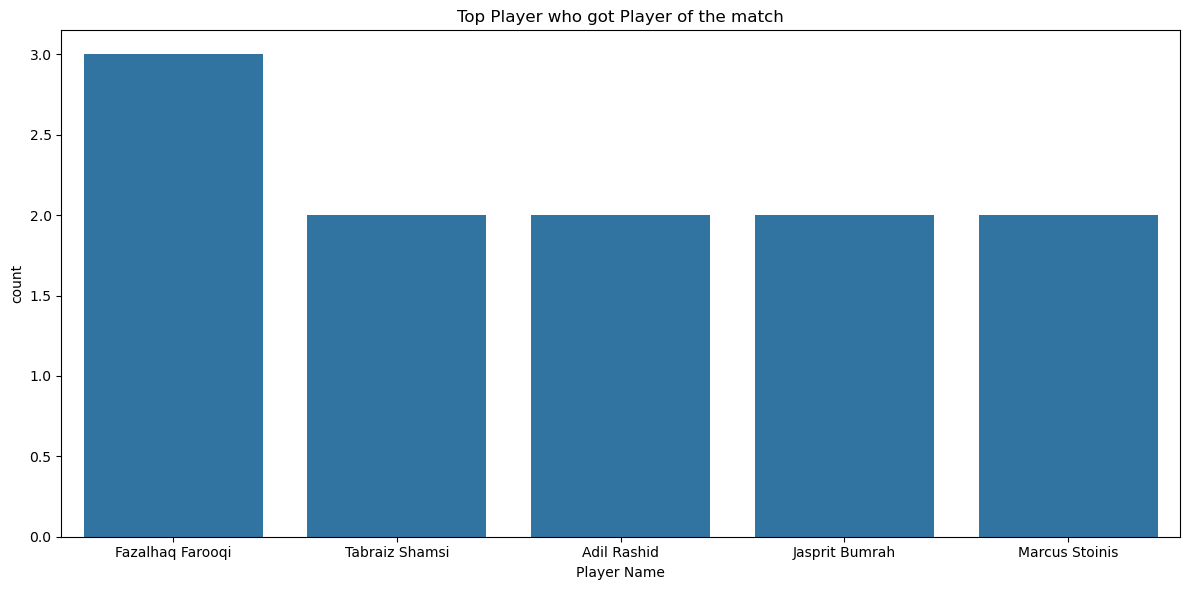

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(data=player_of_the_match.head(5),x='Player Of The Match',y='count')
plt.title('Top Player who got Player of the match')
plt.xlabel('Player Name')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [20]:
# Remove "Rain" from the 'Top Scorer' and 'Best Bowler' columns
df['Top Scorer'] = df['Top Scorer'].replace('Rain', pd.NA)
df['Best Bowler'] = df['Best Bowler'].replace('Rain', pd.NA)

# Drop rows with NA values in 'Top Scorer' and 'Best Bowler' columns
df = df.dropna(subset=['Top Scorer', 'Best Bowler'])

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Rupam\AppData\Local\Temp\ipykernel_5340\3477530156.py:5: SyntaxWarning: invalid escape sequence '\d'
  df['Winning Margin'] = df['Winning Margin'].str.extract('(\d+)').astype(float)


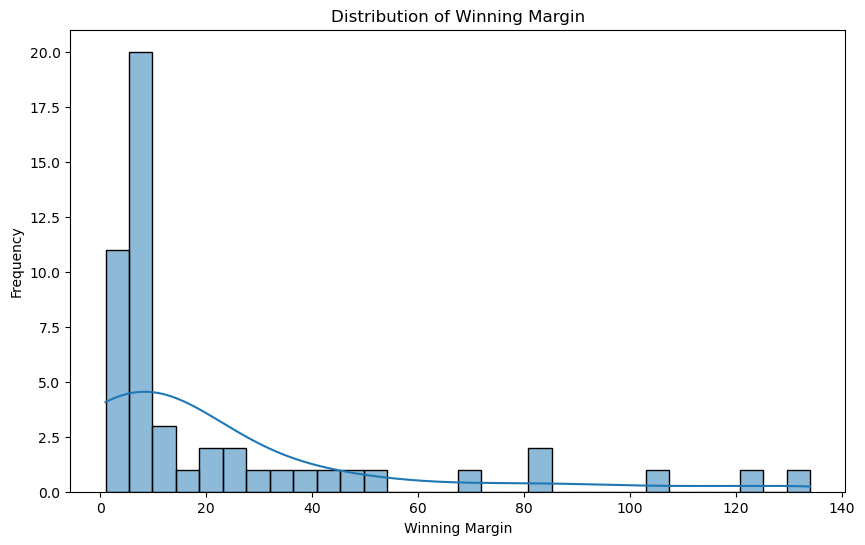

In [22]:
# Ensure all values in 'Winning Margin' are strings
df['Winning Margin'] = df['Winning Margin'].astype(str)

# Convert 'Winning Margin' to numeric, extracting the numeric part only
df['Winning Margin'] = df['Winning Margin'].str.extract('(\d+)').astype(float)

# Plot the distribution of Winning Margin
plt.figure(figsize=(10, 6))
sns.histplot(df['Winning Margin'].dropna(), kde=True, bins=30)
plt.title('Distribution of Winning Margin')
plt.xlabel('Winning Margin')
plt.ylabel('Frequency')
plt.show()

Top scorer player in a single inning

In [25]:
highest_score=df.sort_values(by='Highest Score',ascending=False).reset_index()
highest_score = highest_score.iloc[4:].reset_index(drop=True)
highest_score['Highest Score'] = pd.to_numeric(highest_score['Highest Score'], errors='coerce')

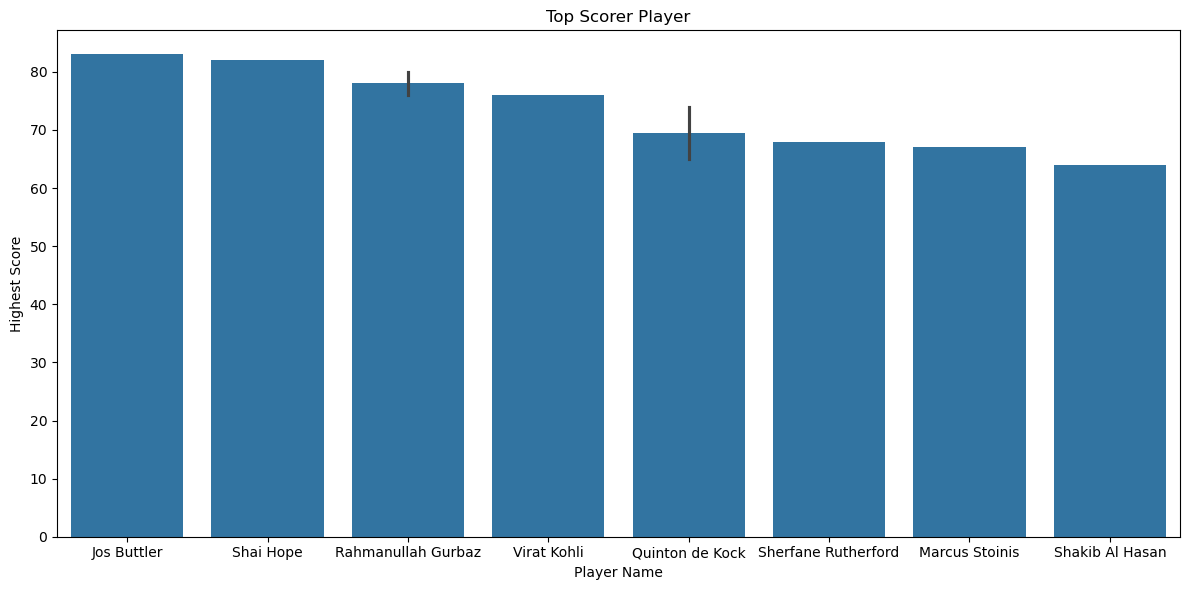

In [27]:
plt.figure(figsize=(12,6))
sns.barplot(data=highest_score.head(10),x='Top Scorer',y='Highest Score')
plt.title('Top Scorer Player')
plt.xlabel('Player Name')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Number of times a player scored highest run for his team.

C:\Users\Rupam\AppData\Local\Temp\ipykernel_5340\140253850.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_scorers.index, y=top_scorers.values, palette='viridis')


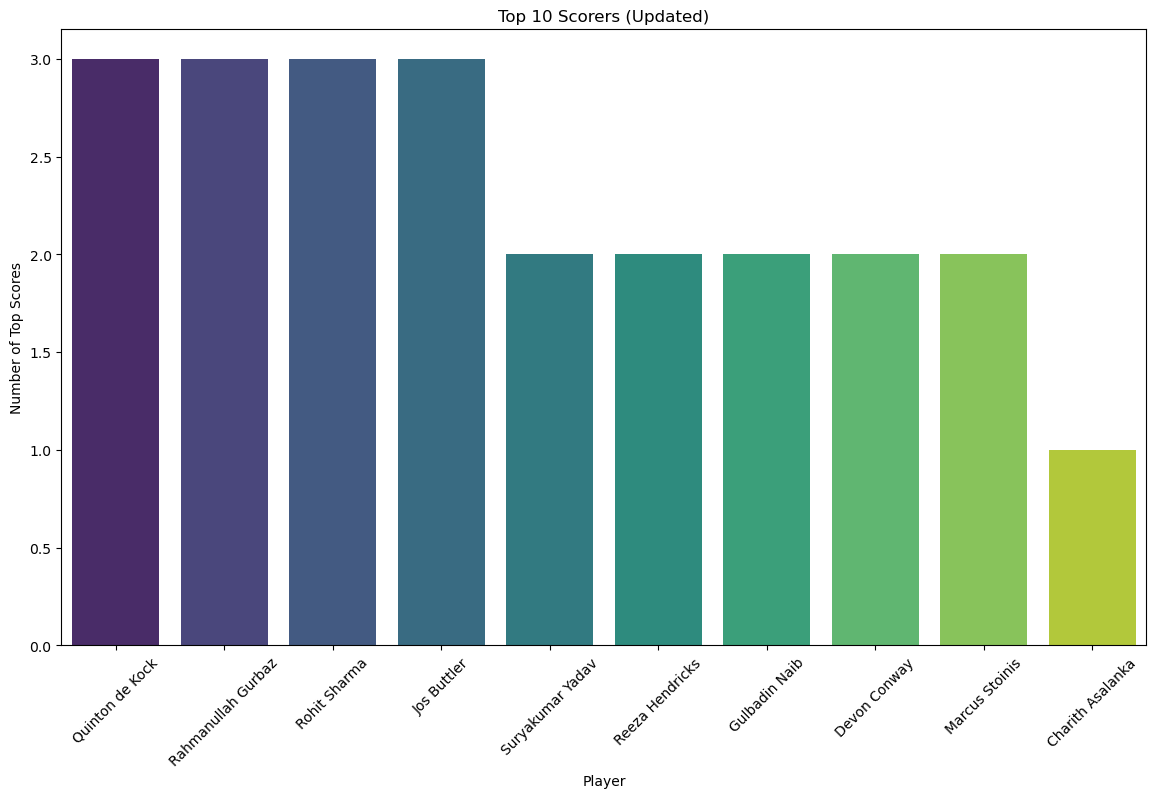

In [29]:
# Plot the updated top scorers
plt.figure(figsize=(14, 8))
top_scorers = df['Top Scorer'].value_counts().head(10)
sns.barplot(x=top_scorers.index, y=top_scorers.values, palette='viridis')
plt.title('Top 10 Scorers (Updated)')
plt.xlabel('Player')
plt.ylabel('Number of Top Scores')
plt.xticks(rotation=45)
plt.show()

Top 10 best Bowlers

C:\Users\Rupam\AppData\Local\Temp\ipykernel_5340\575604710.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=best_bowlers.index, y=best_bowlers.values, palette='magma')


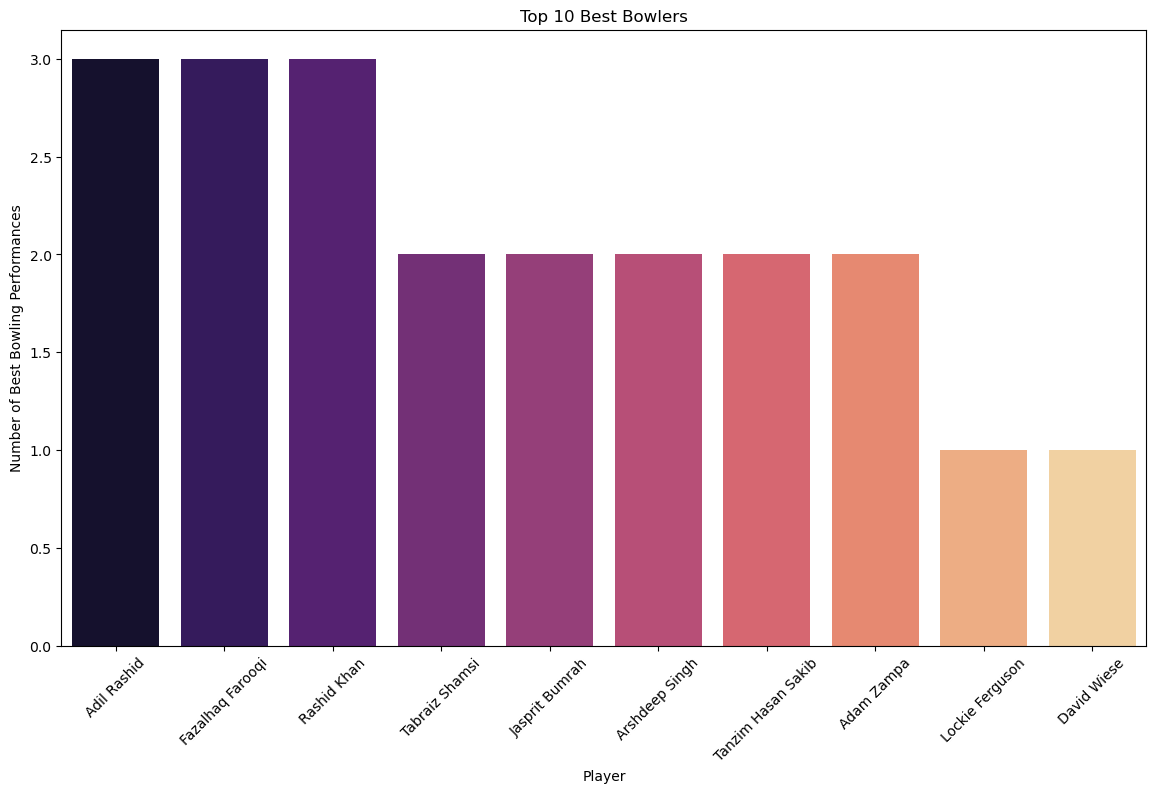

In [39]:
plt.figure(figsize=(14, 8))
best_bowlers = df['Best Bowler'].value_counts().head(10)
sns.barplot(x=best_bowlers.index, y=best_bowlers.values, palette='magma')
plt.title('Top 10 Best Bowlers')
plt.xlabel('Player')
plt.ylabel('Number of Best Bowling Performances')
plt.xticks(rotation=45)
plt.show()

Impact of toss decisions on match outcomes

In [44]:
df['Winning Margin'] = df['Winning Margin'].astype(str)

# Convert 'Winning Margin' to numeric, extracting the numeric part only
df['Winning Margin'] = df['Winning Margin'].str.extract('(\d+)').astype(float)

<>:4: SyntaxWarning: invalid escape sequence '\d'
<>:4: SyntaxWarning: invalid escape sequence '\d'
C:\Users\Rupam\AppData\Local\Temp\ipykernel_5340\249449820.py:4: SyntaxWarning: invalid escape sequence '\d'
  df['Winning Margin'] = df['Winning Margin'].str.extract('(\d+)').astype(float)


In [46]:
df['Toss Win and Match Win'] = df['Toss Winning'] == df['Winners']

C:\Users\Rupam\AppData\Local\Temp\ipykernel_5340\538149508.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=toss_decision_impact.index, y=toss_decision_impact.values, palette='pastel')


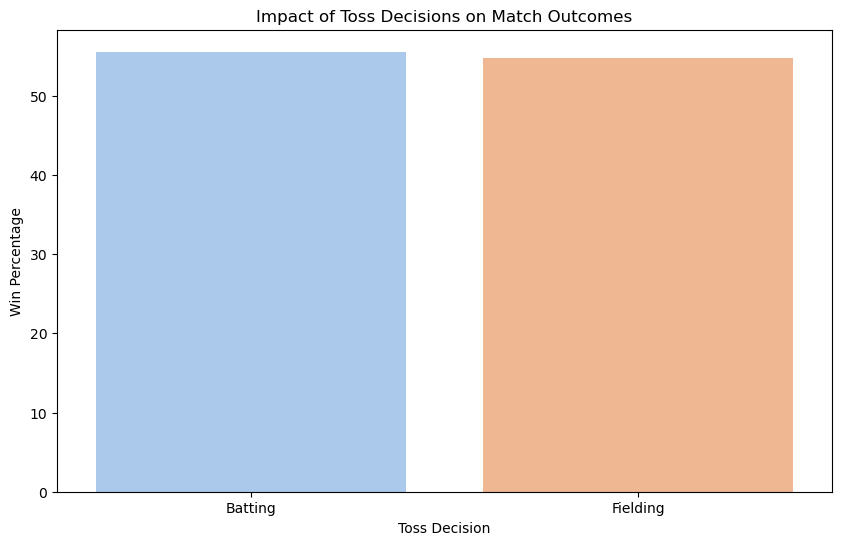

Toss Decision
Batting     55.555556
Fielding    54.761905
Name: Toss Win and Match Win, dtype: float64


In [48]:
# Calculate the win percentage based on the toss decision
toss_decision_impact = df.groupby('Toss Decision')['Toss Win and Match Win'].mean() * 100

# Plot the impact of toss decisions on match outcomes
plt.figure(figsize=(10, 6))
sns.barplot(x=toss_decision_impact.index, y=toss_decision_impact.values, palette='pastel')
plt.title('Impact of Toss Decisions on Match Outcomes')
plt.xlabel('Toss Decision')
plt.ylabel('Win Percentage')
plt.show()

# Display the win percentages
print(toss_decision_impact)

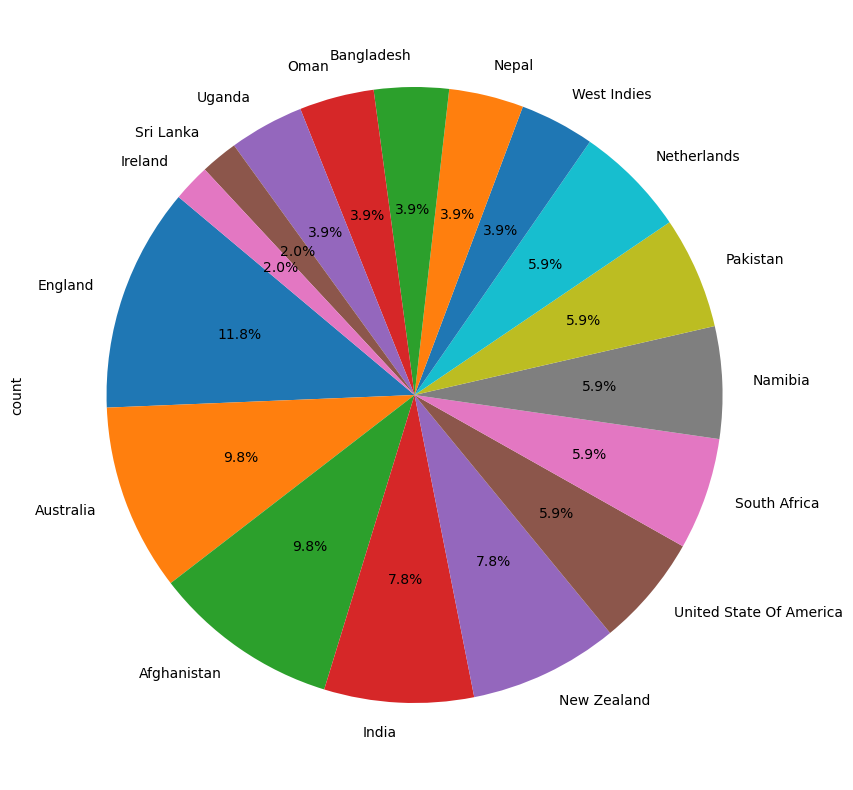

In [50]:
plt.figure(figsize=(15,10))
df['Toss Winning'].value_counts().plot(kind='pie',autopct="%1.1f%%",startangle=140)
plt.show()

Calculate win percentage for each team based on toss decision

In [53]:
team_toss_performance = df.groupby(['1st Team', 'Toss Decision'])['Toss Win and Match Win'].mean().unstack() * 100
team_toss_performance = team_toss_performance.fillna(0)  # Fill NaN values with 0
team_toss_performance

Toss Decision,Batting,Fielding
1st Team,,
Afghanistan,50.0,0.000000
Australia,0.0,0.000000
Bangladesh,0.0,33.333333
Canada,0.0,66.666667
England,0.0,0.000000
India,100.0,0.000000
Ireland,0.0,100.000000
Namibia,0.0,100.000000
Nepal,0.0,100.000000


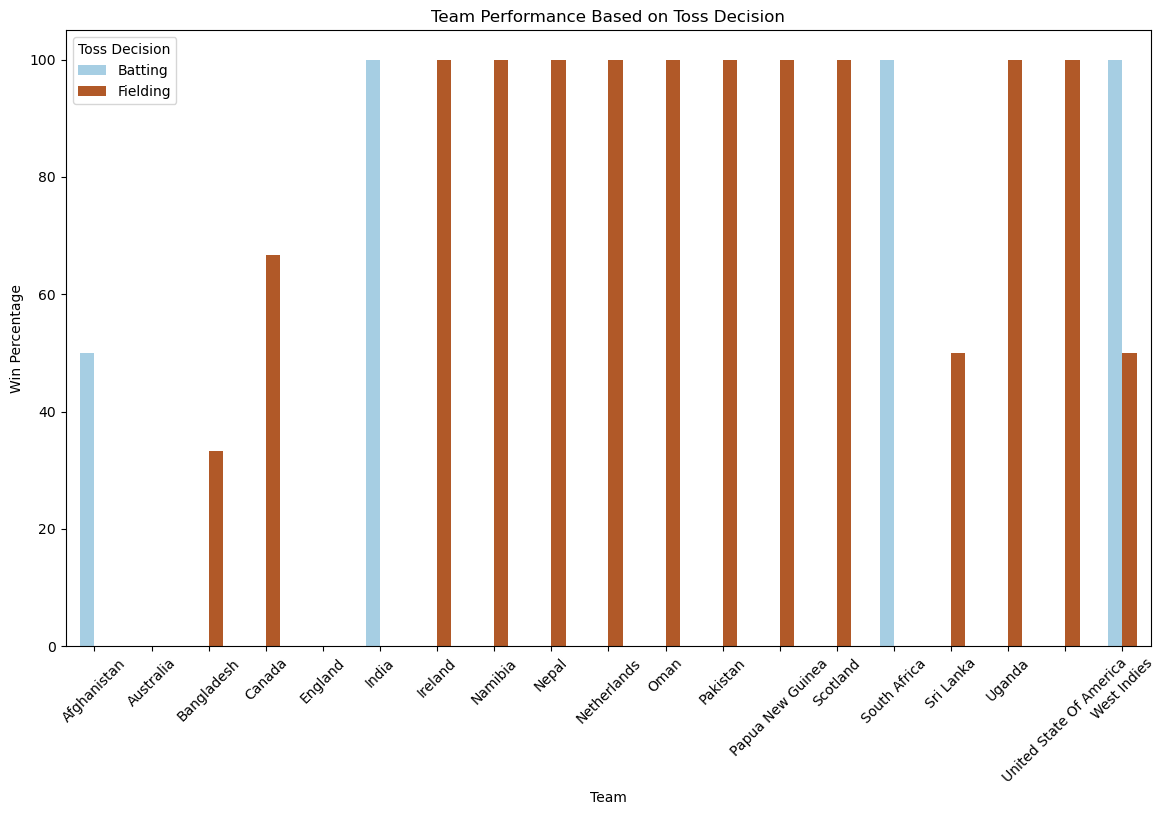

In [55]:
team_toss_performance.plot(kind='bar', figsize=(14, 8), colormap='Paired')
plt.title('Team Performance Based on Toss Decision')
plt.xlabel('Team')
plt.ylabel('Win Percentage')
plt.xticks(rotation=45)
plt.legend(title='Toss Decision')
plt.show()

Winners by Highest margine of Wickets

In [71]:
won=df[df['Won by']=='Wickets']
won=won.sort_values(by='Winning Margin',ascending=False)
won['Winning Margin'] = pd.to_numeric(df['Winning Margin'],errors='coerce')
won.head()
won.shape

(25, 23)

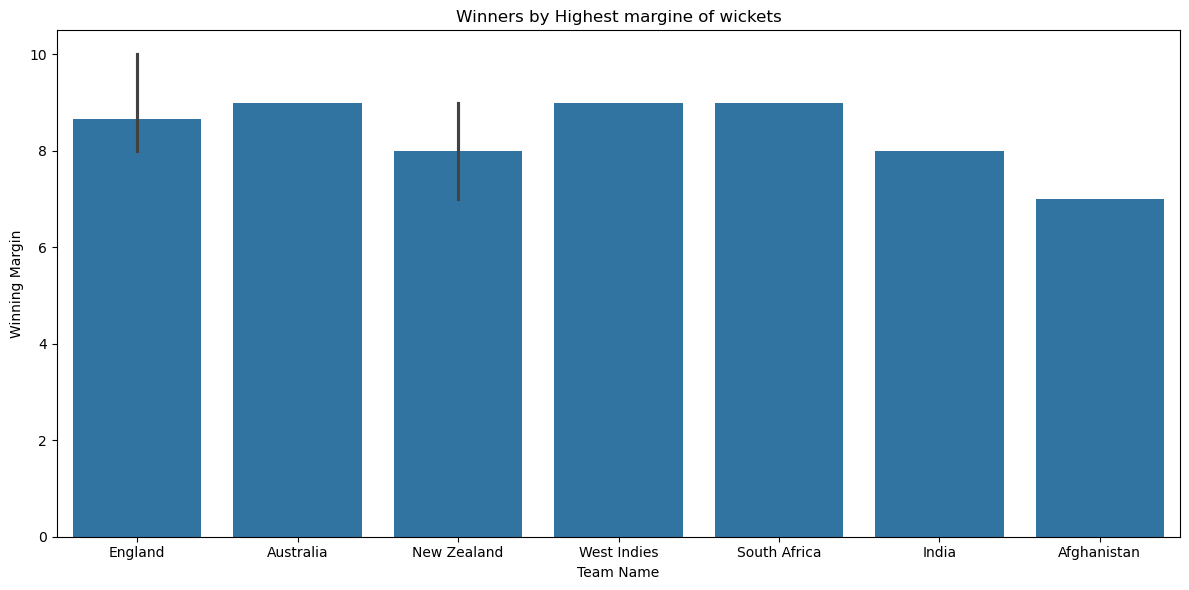

In [73]:
plt.figure(figsize=(12,6))
sns.barplot(data=won.head(10),y='Winning Margin',x='Winners')
plt.title('Winners by Highest margine of wickets')
plt.xlabel('Team Name')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

Winners by Highest margine of Runs

In [76]:
won_by_run=df[df['Won by']=='Runs']
won_by_run['Winning Margin'] = pd.to_numeric(won_by_run['Winning Margin'],errors='coerce')
won_by_run=won_by_run.sort_values(by='Winning Margin')
won_by_run.shape

C:\Users\Rupam\AppData\Local\Temp\ipykernel_5340\3829105375.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  won_by_run['Winning Margin'] = pd.to_numeric(won_by_run['Winning Margin'],errors='coerce')


(26, 23)

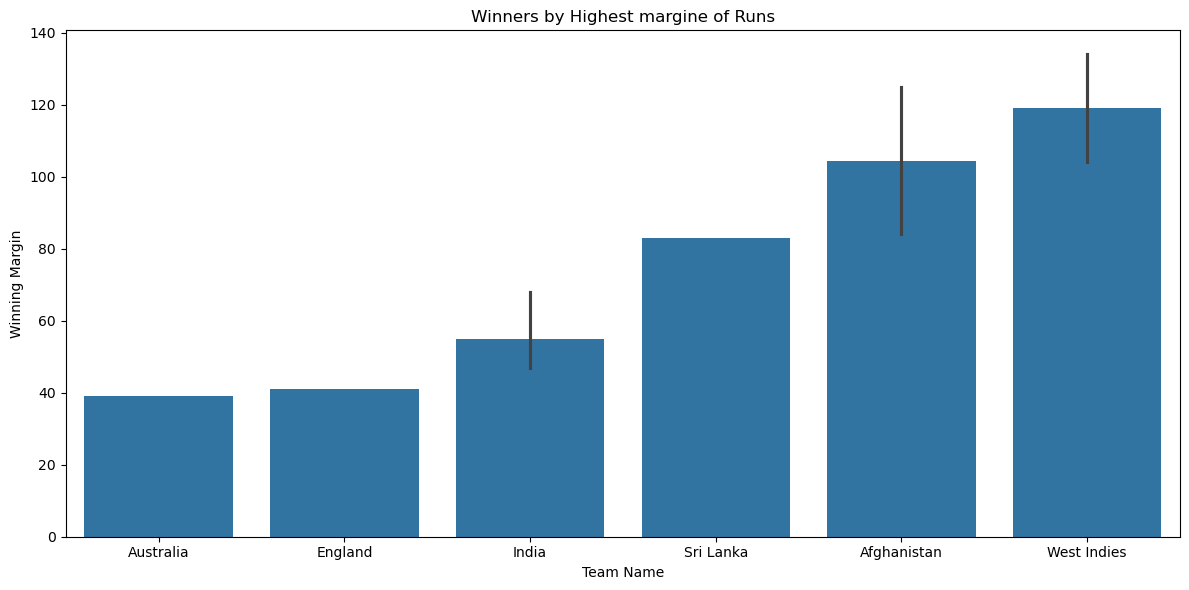

In [78]:
plt.figure(figsize=(12,6))
sns.barplot(data=won_by_run.tail(10),y='Winning Margin',x='Winners')
plt.title('Winners by Highest margine of Runs')
plt.xlabel('Team Name')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

In [81]:
df.columns

Index(['Match No.', 'Date', 'Venue', '1st Team', '2nd Team', 'Stage',
       'Toss Winning', 'Toss Decision', 'First Innings Score',
       'Fall of wickets First Innings', 'Second Innings Score',
       'Fall of wickets Second Innings', 'Winners', 'Method', 'Won by',
       'Winning Margin', 'Top Scorer', 'Highest Score', 'Best Bowler',
       'Best Bowler Figure(Wickets Taken)',
       'Best Bowler Figure(Runs Recieved)', 'Player Of The Match',
       'Toss Win and Match Win'],
      dtype='object')

In [85]:
# Calculate the win percentage for each stage
stage_performance = df.groupby('Stage')['Winners'].count().reset_index(name='Matches')
stage_win_counts = df.groupby(['Stage', 'Winners']).size().reset_index(name='Wins')

# Merge the dataframes to get the win percentages
stage_performance = pd.merge(stage_performance, stage_win_counts, on='Stage')
stage_performance['Win Percentage'] = (stage_performance['Wins'] / stage_performance['Matches']) * 100
stage_performance = stage_performance.pivot(index='Stage', columns='Winners', values='Win Percentage').fillna(0)

stage_performance

Winners,Afghanistan,Australia,Bangladesh,Canada,England,India,Namibia,Netherlands,New Zealand,Pakistan,Scotland,South Africa,Sri Lanka,Uganda,United State Of America,West Indies
Stage,,,,,,,,,,,,,,,,
1st Semi-Final,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,100.000000,0.000000,0.0,0.000000,0.0
2nd Semi-Final,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
Final,0.000000,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
Group 1,33.333333,16.666667,0.000000,0.000000,0.000000,50.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0
Group 2,0.000000,0.000000,0.000000,0.000000,40.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,40.000000,0.000000,0.0,0.000000,20.0
Group A,0.000000,0.000000,0.000000,11.111111,0.000000,33.333333,0.000000,0.000000,0.0,22.222222,0.000000,11.111111,0.000000,0.0,22.222222,0.0
Group B,0.000000,44.444444,0.000000,0.000000,22.222222,0.000000,11.111111,0.000000,0.0,0.000000,22.222222,0.000000,0.000000,0.0,0.000000,0.0
Group C,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.0,0.000000,0.000000,0.000000,0.000000,10.0,0.000000,30.0
Group D,0.000000,0.000000,33.333333,0.000000,0.000000,0.000000,0.000000,11.111111,0.0,0.000000,0.000000,44.444444,11.111111,0.0,0.000000,0.0


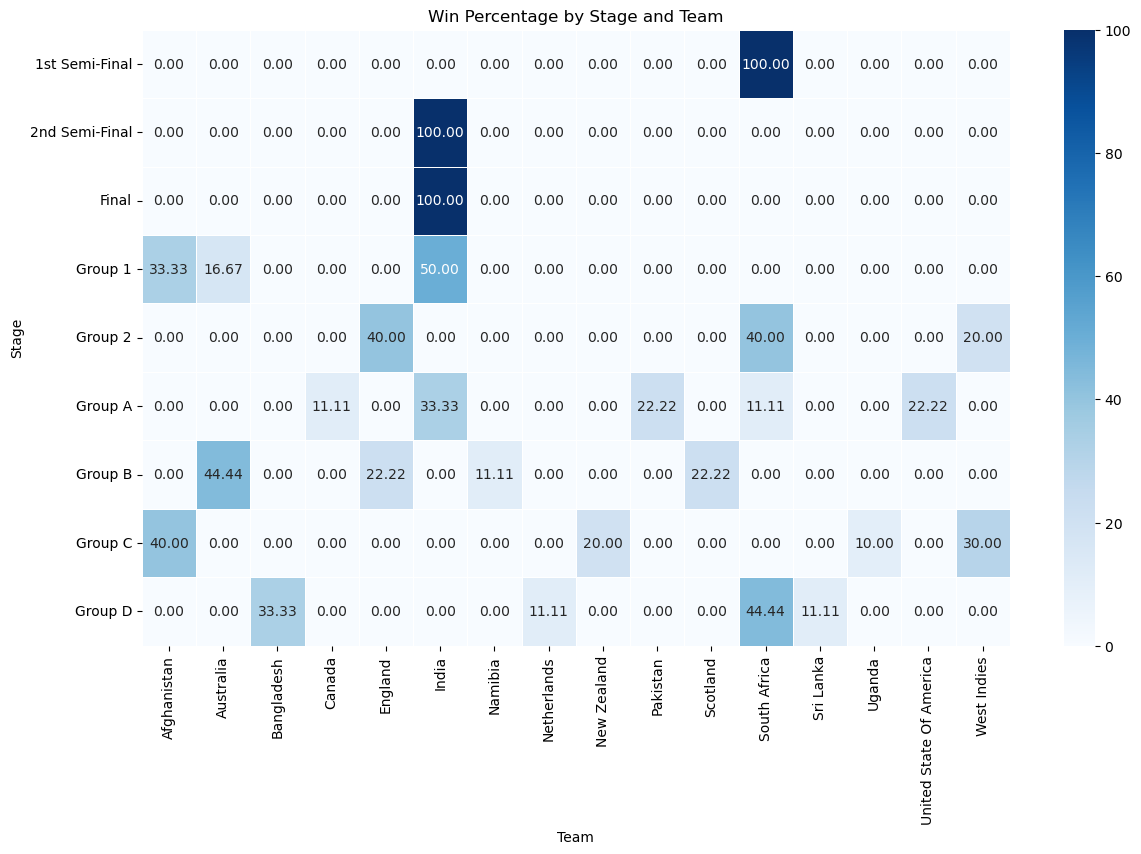

In [87]:
# Plot the performance by stage
plt.figure(figsize=(14, 8))
sns.heatmap(stage_performance, annot=True, fmt='.2f', cmap='Blues', linewidths=.5)
plt.title('Win Percentage by Stage and Team')
plt.xlabel('Team')
plt.ylabel('Stage')
plt.show()

Comparision First innings score VS Second Innings Score

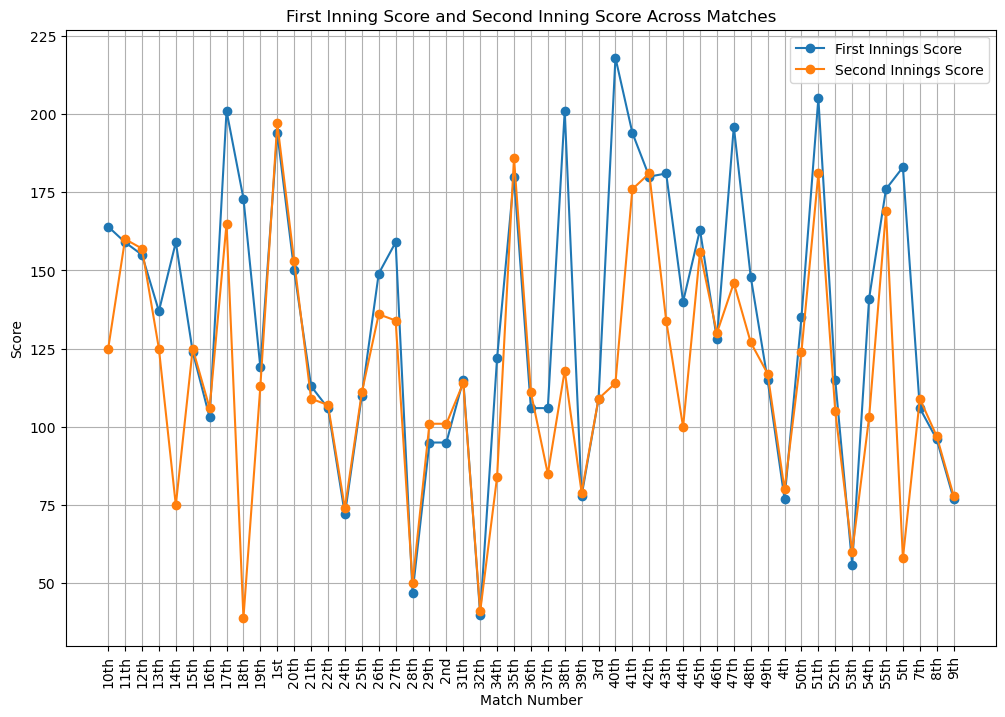

In [100]:
# Sort the dataframe by match number to maintain the sequence of matches
scores_df = scores_df.sort_values('Match No.')

# Plot the line graph for both first and second inning scores
plt.figure(figsize=(12, 8))
plt.plot(scores_df['Match No.'], scores_df['First Innings Score'], marker='o', label='First Innings Score')
plt.plot(scores_df['Match No.'], scores_df['Second Innings Score'], marker='o', label='Second Innings Score')
plt.xticks(rotation=90)
plt.title('First Inning Score and Second Inning Score Across Matches')
plt.xlabel('Match Number')
plt.ylabel('Score')
plt.legend()
plt.grid(True)
plt.show()


Comparision First innings wicket VS Second Innings wicket

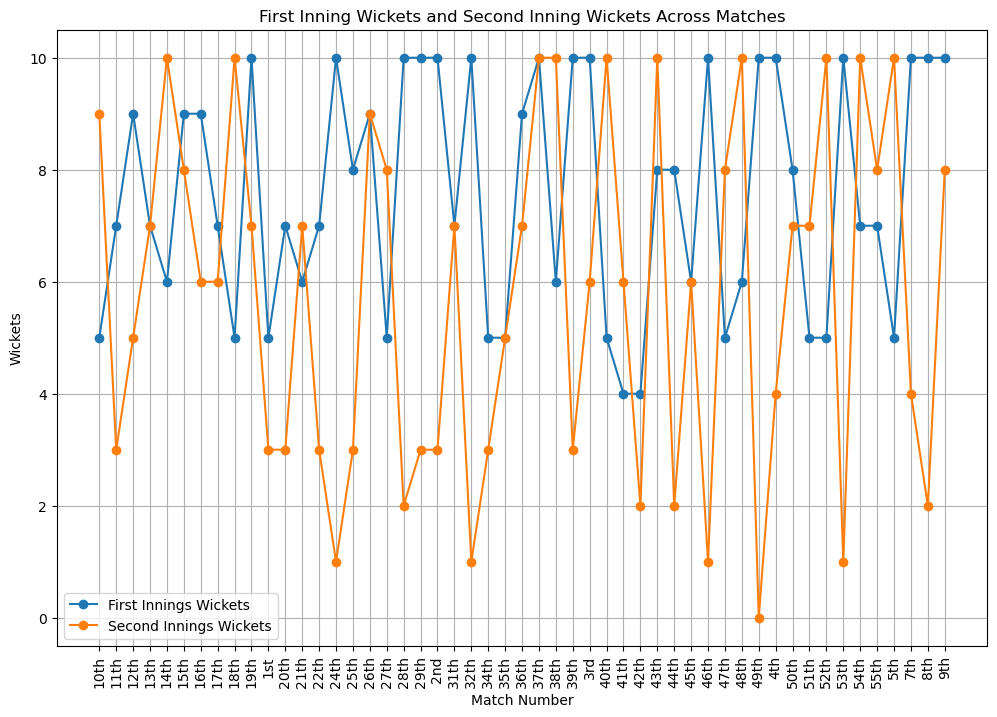

In [103]:
# Convert the 'Fall of wickets First Innings' and 'Fall of wickets Second Innings' columns to integers
df['Fall of wickets First Innings'] = pd.to_numeric(df['Fall of wickets First Innings'], errors='coerce')
df['Fall of wickets Second Innings'] = pd.to_numeric(df['Fall of wickets Second Innings'], errors='coerce')

# Drop rows with NaN values in either 'Fall of wickets First Innings' or 'Fall of wickets Second Innings'
wickets_df = df.dropna(subset=['Fall of wickets First Innings', 'Fall of wickets Second Innings'])

# Sort the dataframe by match number to maintain the sequence of matches
wickets_df = wickets_df.sort_values('Match No.')

# Plot the line graph for both first and second inning wickets
plt.figure(figsize=(12, 8))
plt.plot(wickets_df['Match No.'], wickets_df['Fall of wickets First Innings'], marker='o', label='First Innings Wickets')
plt.plot(wickets_df['Match No.'], wickets_df['Fall of wickets Second Innings'], marker='o', label='Second Innings Wickets')
plt.xticks(rotation=90)
plt.title('First Inning Wickets and Second Inning Wickets Across Matches')
plt.xlabel('Match Number')
plt.ylabel('Wickets')
plt.legend()
plt.grid(True)
plt.show()


Winner teamn

In [118]:
def highlight_winner(s):
    return ['background-color:  #6699cc' if s.name == 'Winners' else '' for v in s]

# Apply style
styled_df = df_win.style.apply(highlight_winner)

# Display styled DataFrame
styled_df

,Match No.,1st Team,2nd Team,Winners
0,1st,Canada,United State Of America,United State Of America
1,2nd,Papua New Guinea,Afghanistan,Afghanistan
2,3rd,Oman,Namibia,Namibia
3,4th,Sri Lanka,South Africa,South Africa
4,5th,Afghanistan,Uganda,Afghanistan
6,7th,Nepal,Netherlands,Netherlands
7,8th,Ireland,India,India
8,9th,Papua New Guinea,Uganda,Uganda
9,10th,Australia,Oman,Australia
10,11th,Pakistan,United State Of America,United State Of America


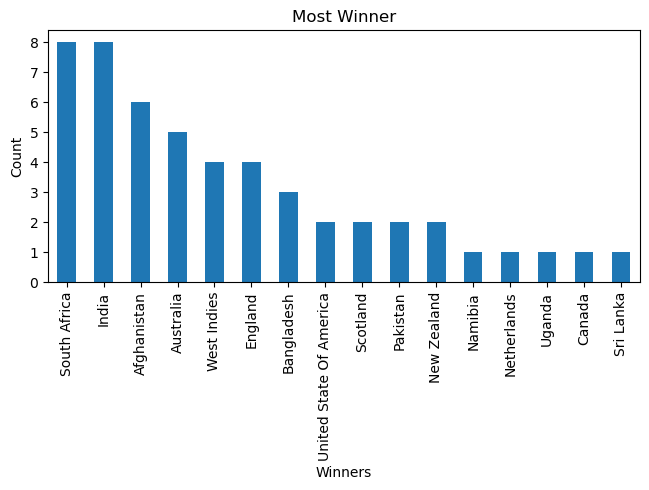

In [120]:
df['Winners'].value_counts().plot(kind='bar')
plt.tight_layout()
plt.title('Most Winner')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

Average Win Margins by Team in ICC Men's T20 World Cup

In [125]:
# Calculate the average win margin for each team
win_margin_by_team = df.groupby('Winners')['Winning Margin'].mean().reset_index()

# Rename columns for clarity
win_margin_by_team.columns = ['Team', 'Average Win Margin']

win_margin_by_team

,Team,Average Win Margin
0,Afghanistan,42.000
1,Australia,23.400
2,Bangladesh,16.000
3,Canada,12.000
4,England,16.750
5,India,27.125
6,Namibia,4.000
7,Netherlands,6.000
8,New Zealand,8.000
9,Pakistan,5.000


C:\Users\Rupam\AppData\Local\Temp\ipykernel_5340\3285222036.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Team', y='Average Win Margin', data=win_margin_by_team, palette='viridis')


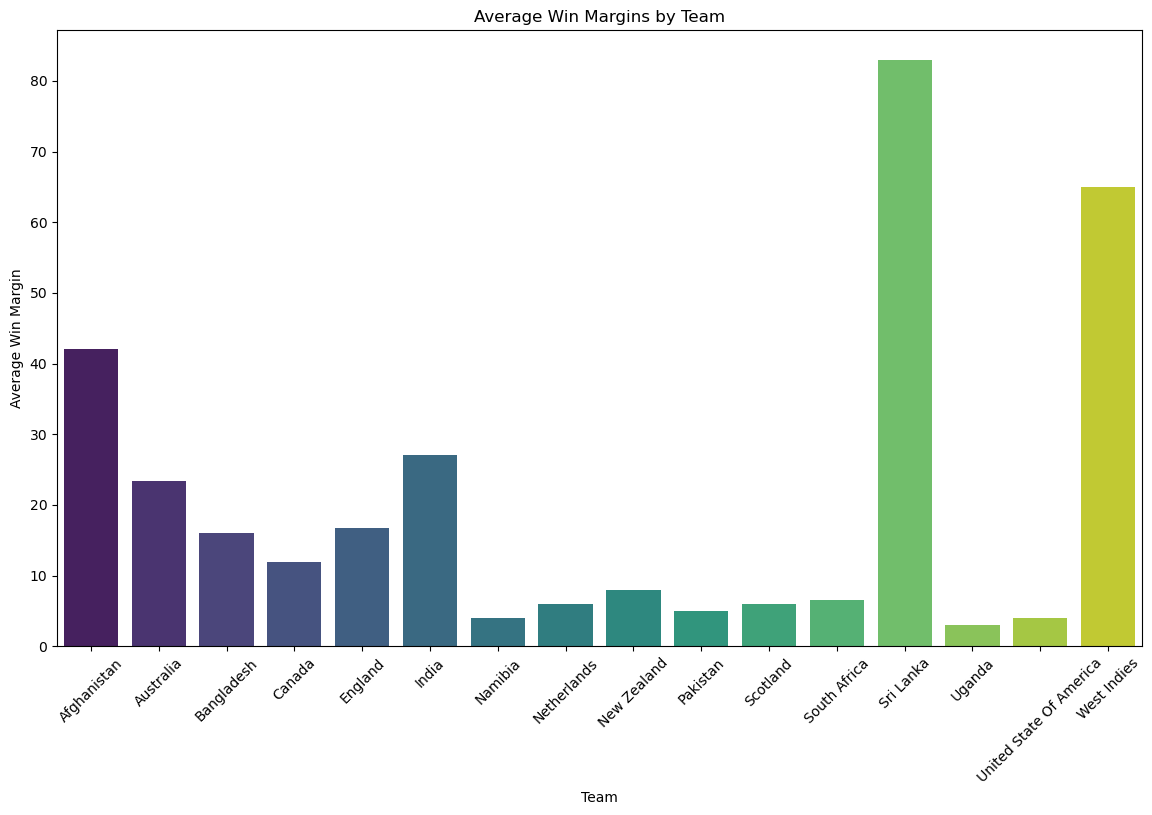

In [127]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Team', y='Average Win Margin', data=win_margin_by_team, palette='viridis')
plt.title('Average Win Margins by Team')
plt.xlabel('Team')
plt.ylabel('Average Win Margin')
plt.xticks(rotation=45)
plt.show()

In [129]:
print(win_margin_by_team)

                       Team  Average Win Margin
0               Afghanistan              42.000
1                 Australia              23.400
2                Bangladesh              16.000
3                    Canada              12.000
4                   England              16.750
5                     India              27.125
6                   Namibia               4.000
7               Netherlands               6.000
8               New Zealand               8.000
9                  Pakistan               5.000
10                 Scotland               6.000
11             South Africa               6.500
12                Sri Lanka              83.000
13                   Uganda               3.000
14  United State Of America               4.000
15              West Indies              65.000


Final Match

In [136]:
# Filter the dataset for the final match
# Assuming that the stage of the final match is labeled as 'Final'
final_match = df[df['Stage'] == 'Final']

# Display the final match data to identify the best bowler and batsman
final_match[['Top Scorer', 'Highest Score', 'Best Bowler', 'Best Bowler Figure(Wickets Taken)']]


,Top Scorer,Highest Score,Best Bowler,Best Bowler Figure(Wickets Taken)
54,Virat Kohli,76,Hardik Pandya,3


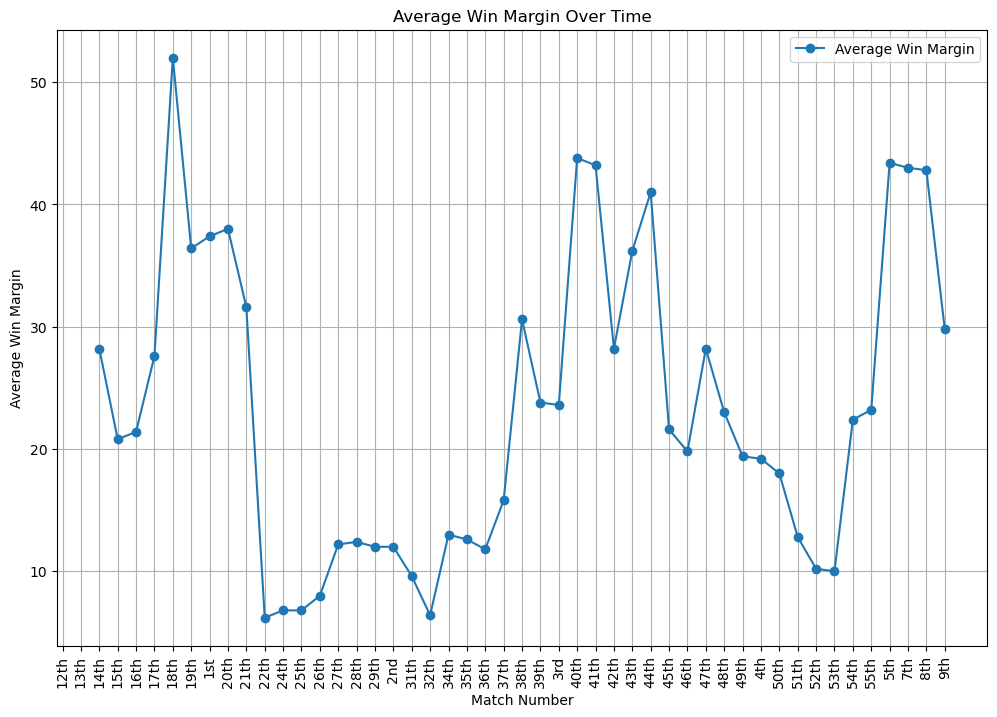

In [138]:
# Convert the 'Winning Margin' to numeric values
df['Winning Margin'] = pd.to_numeric(df['Winning Margin'], errors='coerce')

# Drop rows with NaN values in 'Winning Margin'
win_margin_df = df.dropna(subset=['Winning Margin'])

# Sort the dataframe by match number to maintain the sequence of matches
win_margin_df = win_margin_df.sort_values('Match No.')

# Calculate the rolling average win margin (using a window of 5 matches for smoother visualization)
win_margin_df['Average Win Margin'] = win_margin_df['Winning Margin'].rolling(window=5).mean()

# Plot the line graph for the average win margins over time
plt.figure(figsize=(12, 8))
plt.plot(win_margin_df['Match No.'], win_margin_df['Average Win Margin'], marker='o', label='Average Win Margin')
plt.xticks(rotation=90)
plt.title('Average Win Margin Over Time')
plt.xlabel('Match Number')
plt.ylabel('Average Win Margin')
plt.legend()
plt.grid(True)
plt.show()


Top scorer occurrences by venue

In [144]:
# Group by 'Venue' and 'Top Scorer' and count the occurrences
top_scorer_venue_df = df.groupby(['Venue', 'Top Scorer']).size().reset_index(name='Occurrences')

# Sort the dataframe by occurrences in descending order
top_scorer_venue_df = top_scorer_venue_df.sort_values(by='Occurrences', ascending=False)

# Display the result
top_scorer_venue_df


,Venue,Top Scorer,Occurrences
37,"Providence Stadium, Guyana",Rahmanullah Gurbaz,2
21,"Kensington Oval, Bridgetown, Barbados",Jos Buttler,2
5,"Brian Lara Stadium, Tarouba, Trinidad",Devon Conway,2
36,"Providence Stadium, Guyana",Johnson Charles,1
27,"Nassau County International Cricket Stadium, N...",Aaron Johnson,1
28,"Nassau County International Cricket Stadium, N...",David Miller,1
29,"Nassau County International Cricket Stadium, N...",Heinrich Klaasen,1
30,"Nassau County International Cricket Stadium, N...",Nicholas Kirton,1
31,"Nassau County International Cricket Stadium, N...",Quinton de Kock,1
32,"Nassau County International Cricket Stadium, N...",Rishabh Pant,1
